The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# EDA

In [2]:
churn=pd.read_csv('telco.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data=[]
for item in churn.columns:
    data.append([item,churn[item].dtype,
                 churn[item].isna().sum(),
                 churn[item].isna().sum()/churn[item].isna().count()*100,
                 len(churn[item].unique()),
                 list(churn[item].drop_duplicates().sample(2))])

In [7]:
summary=pd.DataFrame(data,columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])

In [8]:
summary

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[7013-PSXHK, 5275-SQEIZ]"
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[1, 0]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,73,"[35, 41]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[No phone service, No]"
8,InternetService,object,0,0.0,3,"[No, DSL]"
9,OnlineSecurity,object,0,0.0,3,"[No internet service, No]"


In [9]:
churn['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
19.65       8
20.05       8
19.55       7
45.3        7
19.45       6
20.25       6
20.15       6
20.3        5
20.45       5
20.35       4
44          4
20.5        4
44.4        4
70.6        4
75.3        4
20.4        4
74.7        4
19.5        4
69.9        4
19.85       4
19.3        4
69.65       4
19.2        4
50.15       4
49.9        4
19.4        4
69.6        4
19.95       4
69.95       4
25.25       3
20.55       3
84.5        3
45.85       3
74.35       3
20          3
80.55       3
45.1        3
70.45       3
50.6        3
74.9        3
74.3        3
79.55       3
55.7        3
305.55      3
35.9        3
44.75       3
           ..
294.5       1
4312.5      1
3177.25     1
6962.85     1
4036.85     1
25.4        1
3454.6      1
1416.5      1
819.4       1
1288        1
832.3       1
2660.2      1
1654.7      1
4913.3      1
5935.1      1
918.6       1
7379.8      1
3503.5      1
2816.65     1
1423.65     1
6615.1

In [10]:
churn[churn['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
churn[(churn['tenure']==0) & (churn['TotalCharges']==' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
error_index=churn[(churn['tenure']==0) & (churn['TotalCharges']==' ')].index

In [13]:
error_index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [14]:
def fill_space(col):
    if col==' ':
        return 0
    else:
        return col

In [15]:
churn['TotalCharges']=churn['TotalCharges'].apply(fill_space)

In [16]:
list_error=[]
for row in error_index:
    list_error.append(churn.loc[row])

In [17]:
df_error=pd.DataFrame(list_error)

In [18]:
df_error.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No


In [19]:
churn['TotalCharges']=churn['TotalCharges'].astype(float)

In [20]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
churn[churn['PaymentMethod']=='Mailed check']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes
32,6827-IEAUQ,Female,0,Yes,Yes,27,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Mailed check,66.15,1874.45,No
40,8865-TNMNX,Male,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,49.55,475.70,No
42,9867-JCZSP,Female,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


I am kinda curious, is there any difference between people who have partner or not for people who choose mailed check. Let's try to visualize this by using the countplot. I would also like to create a grid with the Payment Method as the columns to see the difference between each payment method.

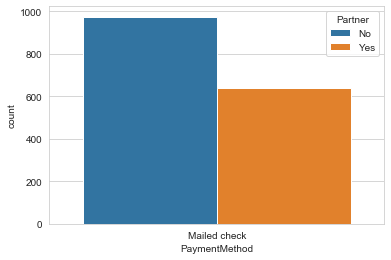

In [22]:
MailedCheck=churn[churn['PaymentMethod']=='Mailed check']
sns.countplot(MailedCheck['PaymentMethod'],hue=MailedCheck['Partner'])

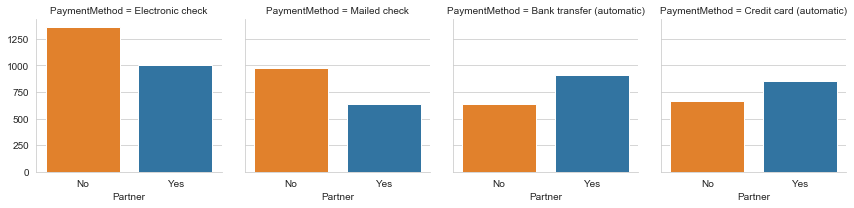

In [23]:
g=sns.FacetGrid(churn, col='PaymentMethod', hue='Partner')
g=g.map(sns.countplot, 'Partner', order=["No", "Yes"])

Seems there is interesting finding that people who paid via Mailed Check are less likely to have partner compared to the other payment method. Let's try to use another feature to find any interesting finding, this time I would use the tenure feature with distribution plot. Just like before, I would create grid with different payment method as the columns.

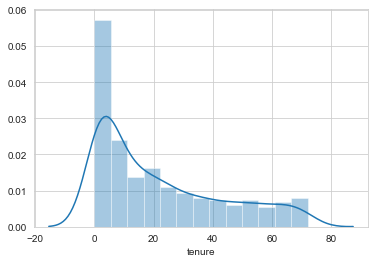

In [24]:
sns.distplot(MailedCheck['tenure'])

From the plot above, what could you conclude about people who paid via mailed check? (Just try to answer by looking at the plot above). Why do you think these pattern happen?

menurut saya, orang yang membayar dengan mailed check mayoritas merupakan orang yang baru-baru berlangganan, terlihat dari distribution plot yang memiliki skewness ke kiri atau positif.

pola yang serupa juga terjadi pada metode pembayaran electronic check. sedangkan pada metode pembayaran bank transfer dan credit card, didominasi oleh orang-orang yang telah berlangganan lama, terlihat dari persebaran data yang memiliki negatif skewness atau ke arah kanan.

hal ini terjadi mungkin karena orang-orang yang sudah berlangganan lama cenderung sudah nyaman dengan pelayanan perusahaan sehingga ingin terus berlangganan dan agar mudah, langsung dipotong secara otomatis biayanya. sedangkan untuk mereka yang masih awal-awal berlangganan, masih ingin terus mengevaluasi apa yang mereka dapatkan dari perusahaan ini sehingga agar proses evaluasi itu terus berjalan dengan baik dan tidak kebablasan, mereka ingin membayar secara manual.

That is enough EDA between feature, now let's focus to the our target (Churn). First, try to visualize the count of the Churn feature

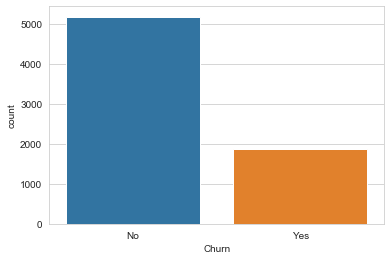

In [25]:
sns.countplot(churn['Churn'])

It seems we have a case of imbalanced dataset for churn prediction. Let's try to visualize the distirbution for every category and numerical columns that we have. Before we proceed, replace the SeniorCitizen feature value with 0 as No and 1 as Yes.

In [26]:
def change_senior(col):
    if col==1:
        return 'Yes'
    else:
        return 'No'

In [27]:
churn['SeniorCitizen']=churn['SeniorCitizen'].apply(change_senior)

In [28]:
numeric_columns = churn.select_dtypes(exclude='O').columns

In [29]:
numeric_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [30]:
unwanted=list(numeric_columns)

In [31]:
unwanted

['tenure', 'MonthlyCharges', 'TotalCharges']

In [32]:
unwanted.append('customerID')
unwanted.append('Churn')

In [33]:
unwanted

['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID', 'Churn']

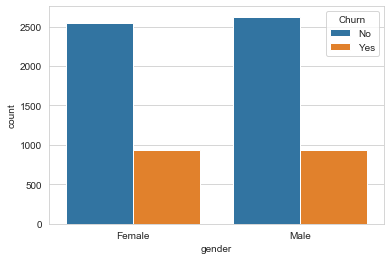

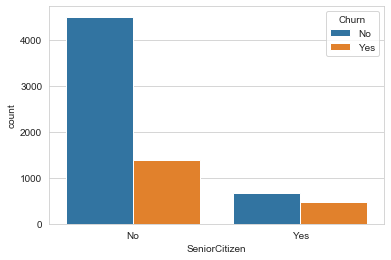

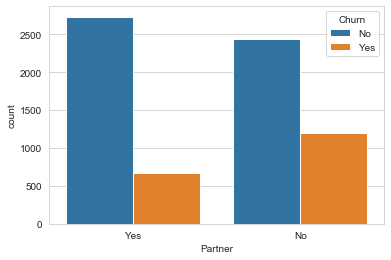

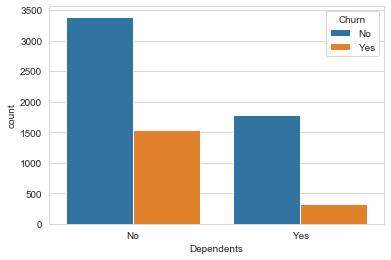

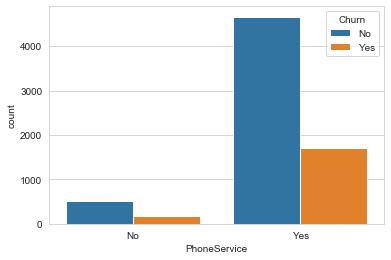

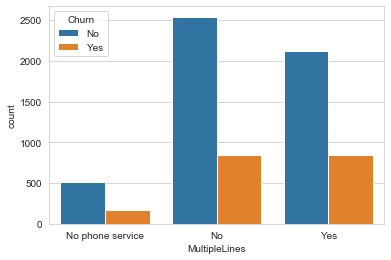

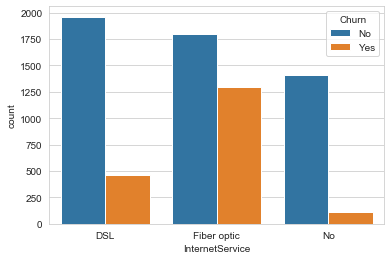

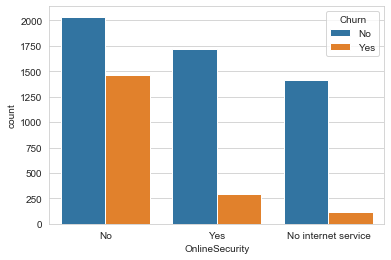

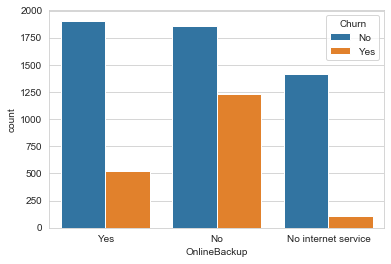

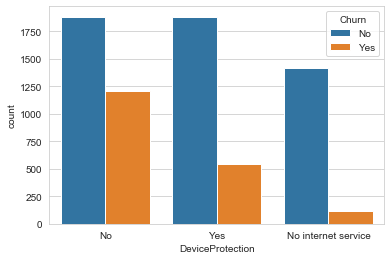

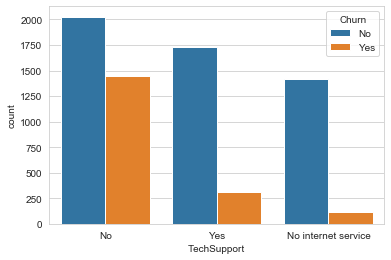

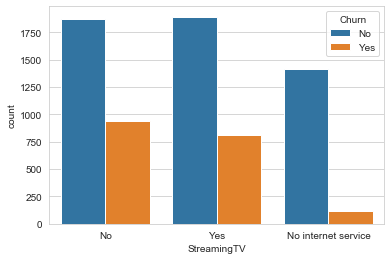

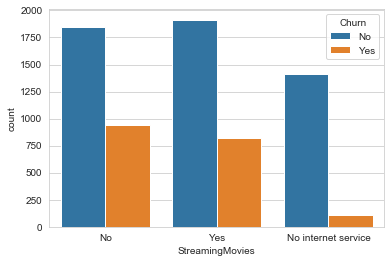

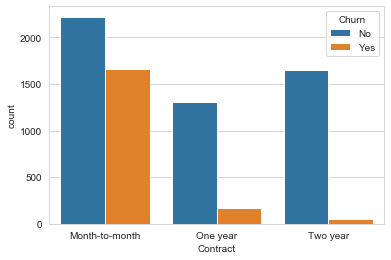

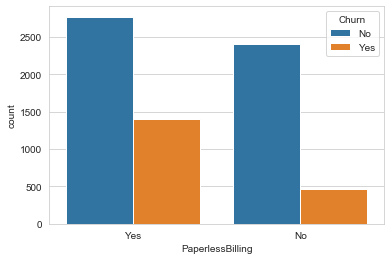

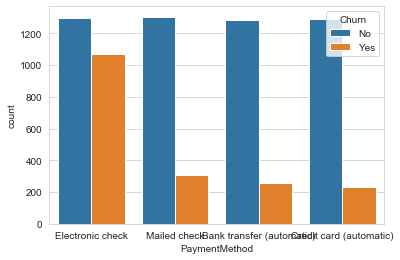

In [34]:
for item in churn.columns:
    if item not in unwanted:
        sns.countplot(churn[item], hue=churn['Churn'])
        plt.show()
    else:
        None

In [35]:
numeric_columns = churn.select_dtypes(exclude='O').columns

In [36]:
numeric_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

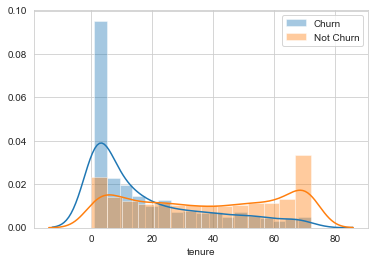

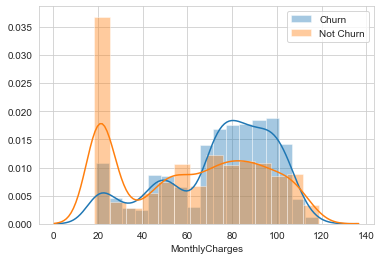

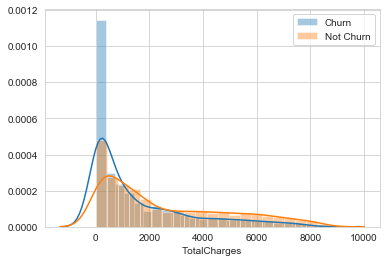

In [37]:
for item in numeric_columns:
    sns.distplot(churn[churn['Churn']=='Yes'][item], label='Churn')
    sns.distplot(churn[churn['Churn']=='No'][item], label='Not Churn')
    plt.legend()
    plt.show()

dari grafik tersebut, saya mendapatkan beberapa insight menarik, seperti:
1. senior memiliki persentase churn dan tidak yang cukup imbang, sedangkan non senior memiliki kemungkinan condong ke tidak
2. memiliki parner menurunkan churn rate
3. Interner Service memiliki peran penting dalam menentukan churn rate. dimana jika berlangganan internet service, kemungkinan untuk berhenti akan meningkat, sedangkan jika tidak berlangganan akan kecil kemungkinan untuk berhenti. setelah analisis lebih lanjut, hal ini berkaitan dengan online security, online backup, device protection dan tech support. Jika orang yang berlangganan internet dan berlangganan fitur tersebut, maka churn rate akan rendah. sedangkan apabila berlangganan internet dan tidak berlangganan fitur tersebut, maka churn rate akan tinggi. maka penting untuk perusahaan untuk memasarkan fitur2 ini bersamaan dengan internet agar konsumen lebih senang dan tetap berlangganan ke perusahaan
4. periode kontrak yang semakin lama(tahunan) lebih menurunkan churn rate dibandingkan dengan month-to-month
5. electronic check memiliki churn rate yang tinggi

As our aim is to use machine learning for prediction, lets prepare our columns to be ready for machine learning activities. First, drop the CustomerID column then change all the category columns into numerical value by using get_dummies (OneHotEncoder) except the target column (Churn). Also, set the drop_first parameter as True

In [38]:
churn.drop('customerID', axis=1,inplace=True)

In [39]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
churn.to_csv('churn.csv')

In [41]:
data=churn.drop('Churn',axis=1)

In [42]:
target=churn['Churn']

In [43]:
dummy_col = list(data.select_dtypes(include='O').columns)

In [44]:
dummy_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [45]:
data_dummy=pd.get_dummies(data=data, drop_first=True, columns=dummy_col)

In [46]:
data_dummy.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [47]:
target=pd.DataFrame(target)

In [48]:
target.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [49]:
target['Churn']=target['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [50]:
target.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [51]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
gender_Male                              7043 non-null uint8
SeniorCitizen_Yes                        7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service   

# Clustering

In [60]:
label=pd.read_csv('label.csv')

In [81]:
churn['label']=label['0']
data_dummy['label']=label['0']

In [66]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,2
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,2
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,2
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,3


Text(0, 0.5, 'Monthly Charges')

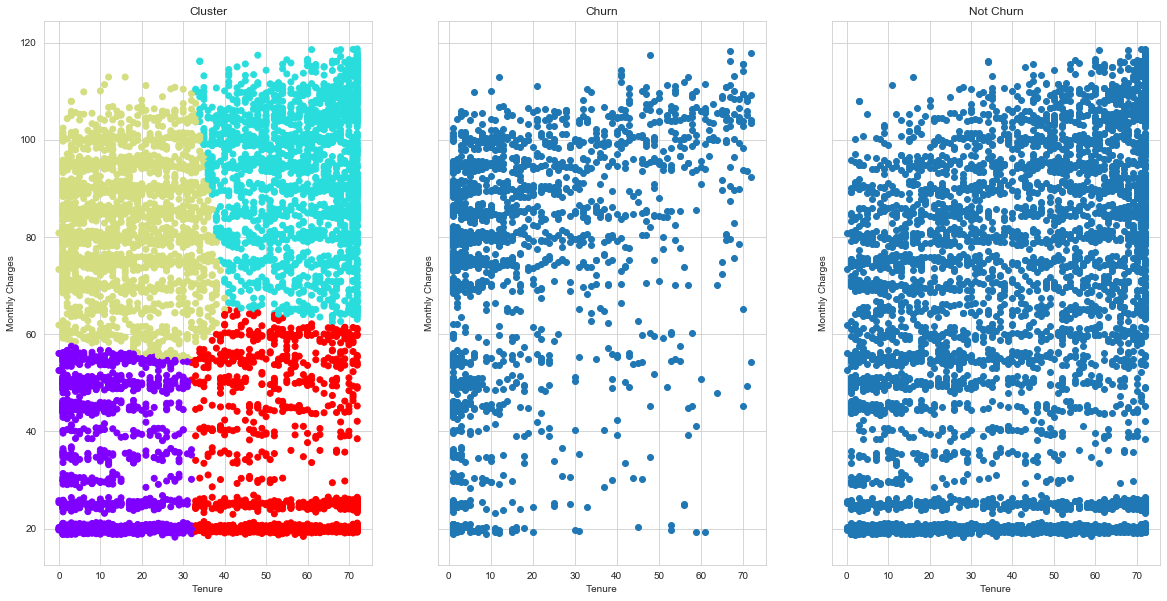

In [69]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(20,10))
ax1.set_title('Cluster')
ax1.scatter(churn['tenure'], churn['MonthlyCharges'], c=churn['label'], cmap='rainbow')
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Monthly Charges')

ax2.set_title('Churn')
ax2.scatter(churn[churn['Churn']=='Yes']['tenure'], churn[churn['Churn']=='Yes']['MonthlyCharges'], label='Yes')
ax2.set_xlabel('Tenure')
ax2.set_ylabel('Monthly Charges')

ax3.set_title('Not Churn')
ax3.scatter(churn[churn['Churn']=='No']['tenure'], churn[churn['Churn']=='No']['MonthlyCharges'], label='No')
ax3.set_xlabel('Tenure')
ax3.set_ylabel('Monthly Charges')


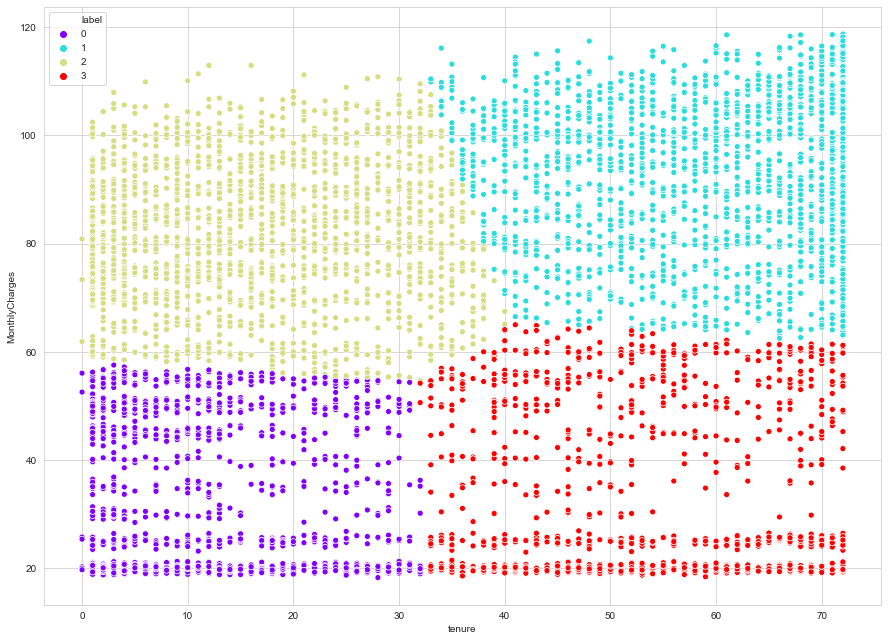

In [70]:
plt.figure(figsize=(15,11))
sns.scatterplot(churn['tenure'], churn['MonthlyCharges'], hue=churn['label'],palette='rainbow')

In [71]:
label0=churn[churn['label']==0]
label1=churn[churn['label']==1]
label2=churn[churn['label']==2]
label3=churn[churn['label']==3]

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


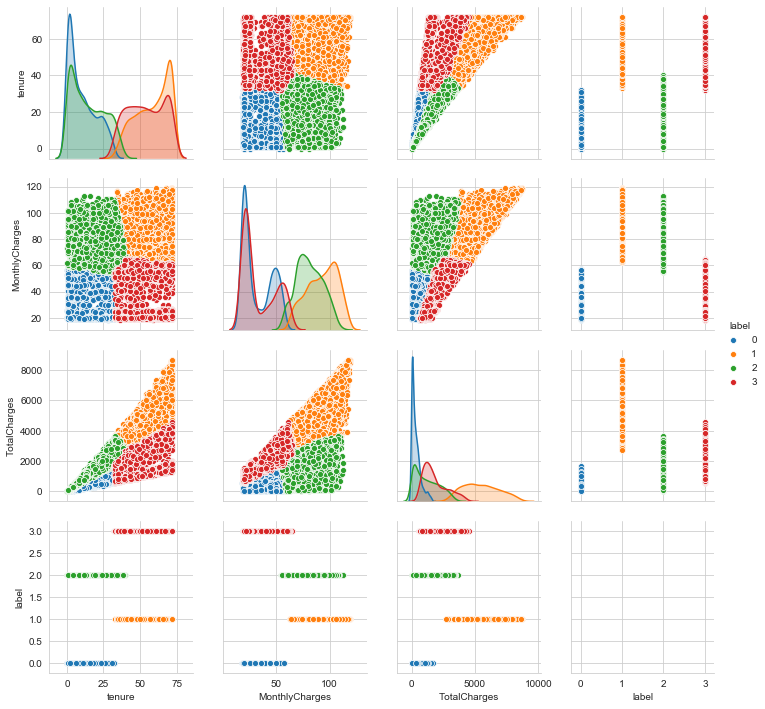

In [72]:
sns.pairplot(churn, hue='label')

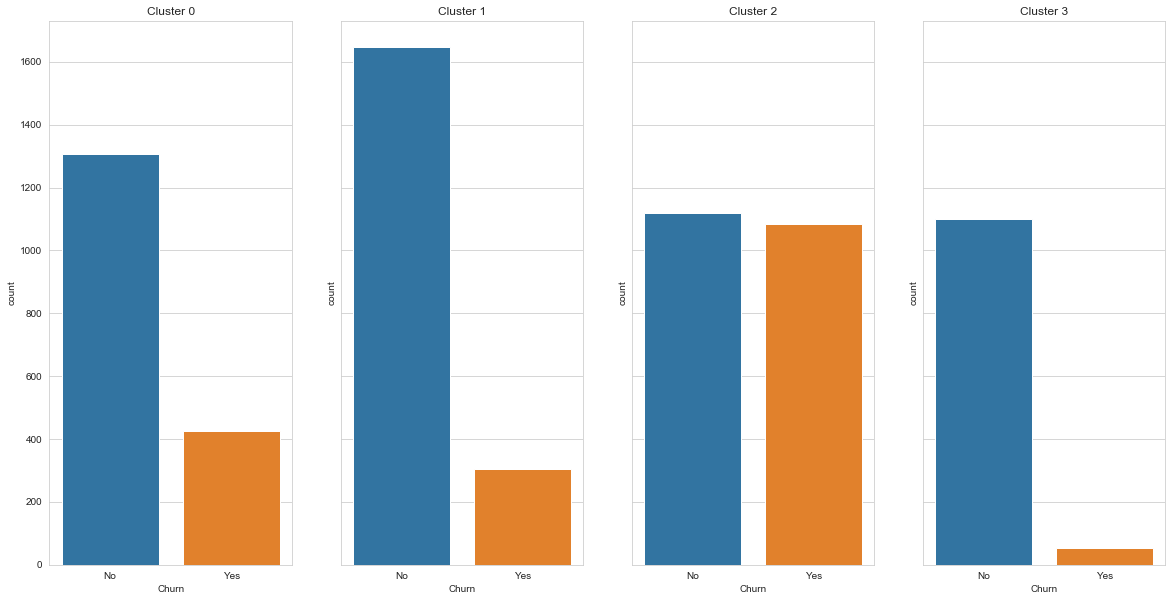

In [73]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True,figsize=(20,10))
ax1.set_title('Cluster 0')
sns.countplot(label0['Churn'], ax=ax1)

ax2.set_title('Cluster 1')
sns.countplot(label1['Churn'], ax=ax2)

ax3.set_title('Cluster 2')
sns.countplot(label2['Churn'], ax=ax3, order=['No','Yes'])

ax4.set_title('Cluster 3')
sns.countplot(label3['Churn'], ax=ax4)



In [77]:
df_object = list(churn.select_dtypes(include='O').columns)

In [78]:
df_object

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

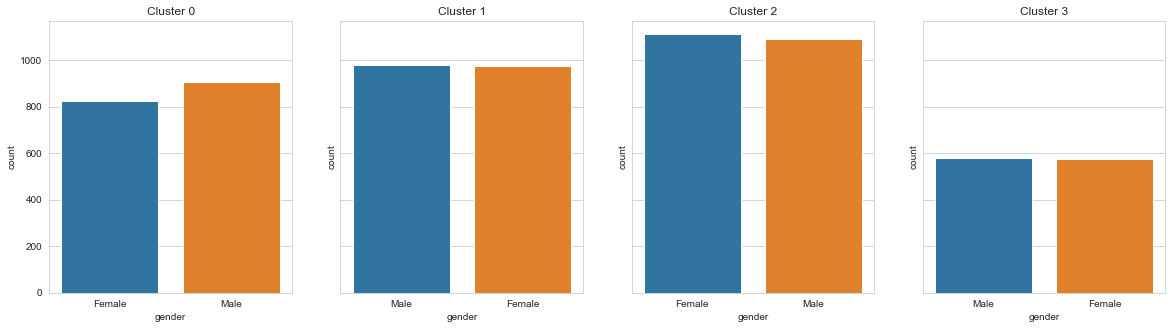

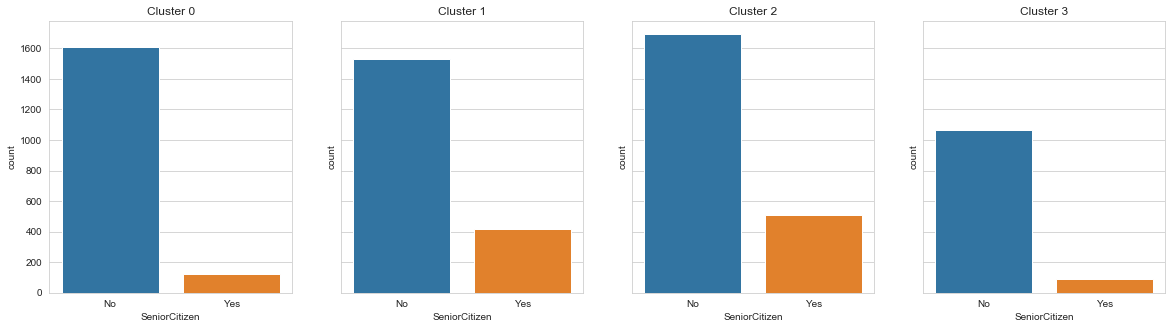

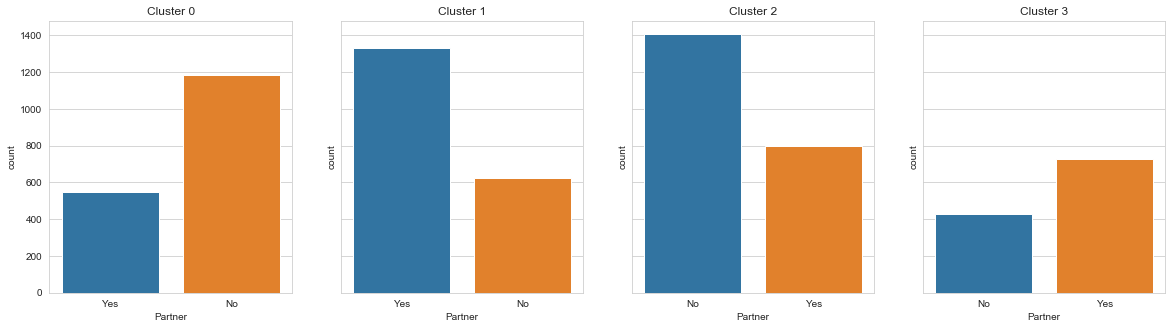

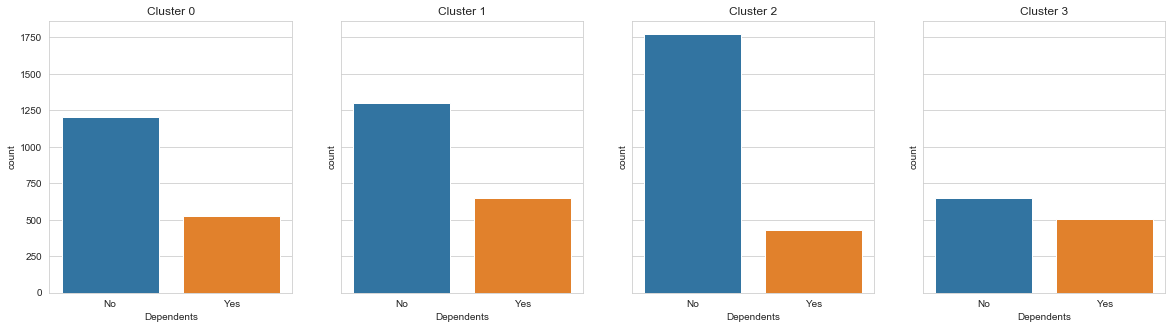

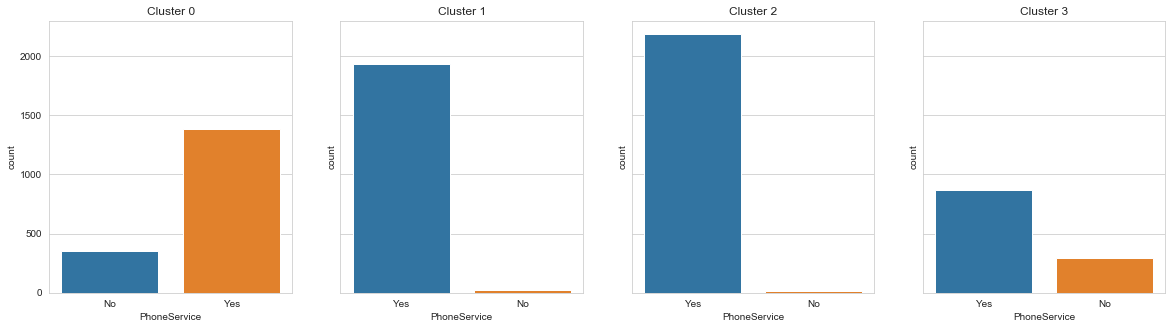

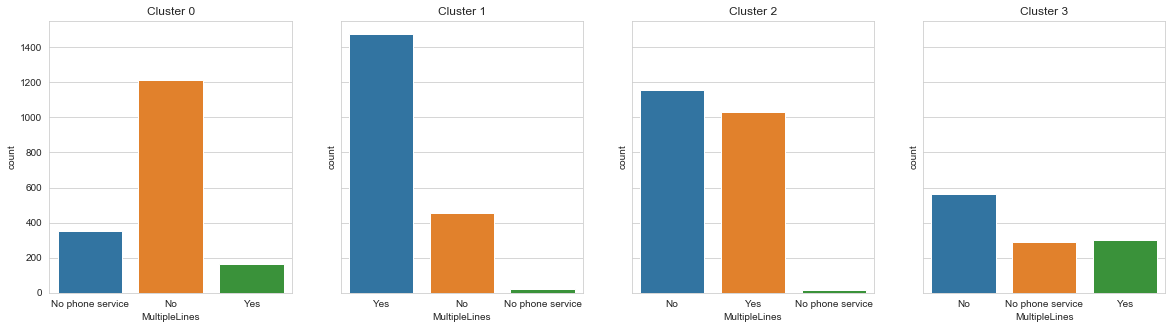

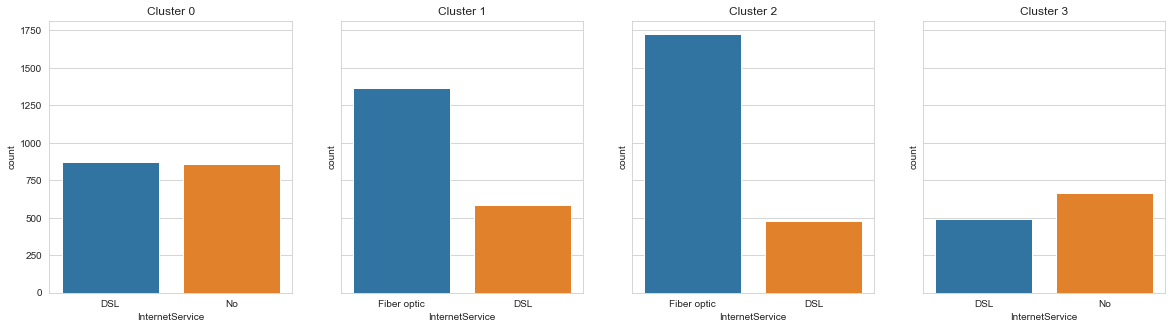

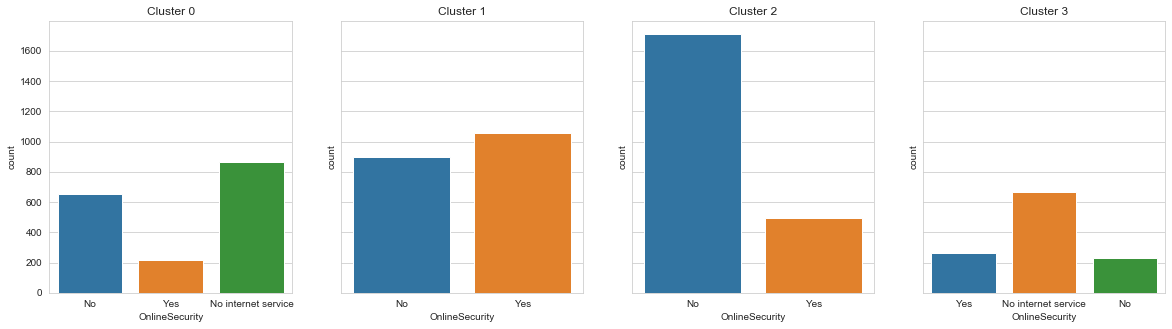

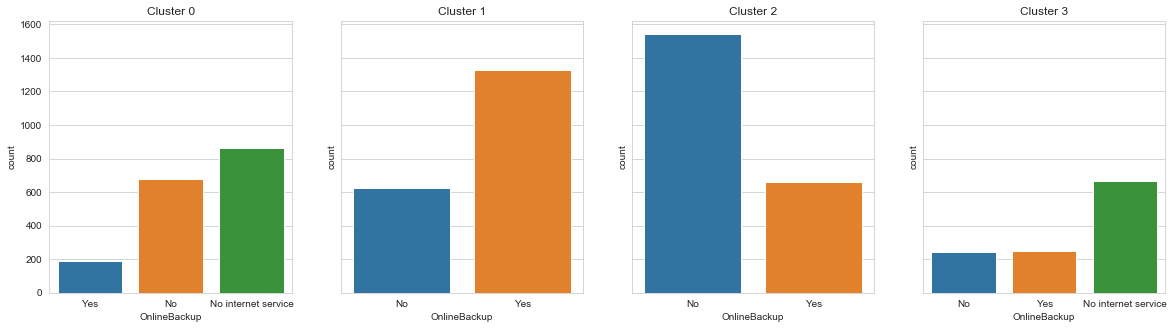

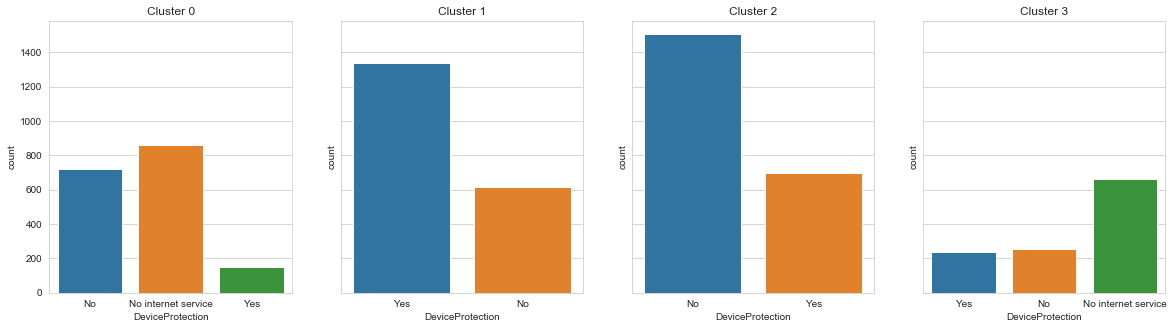

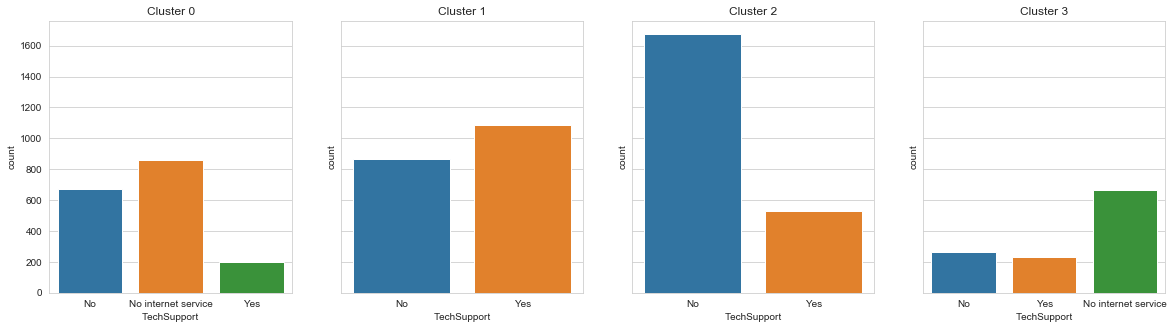

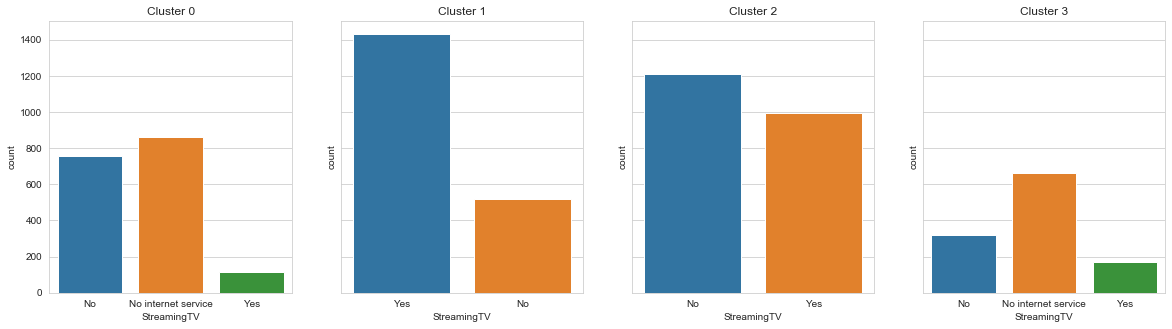

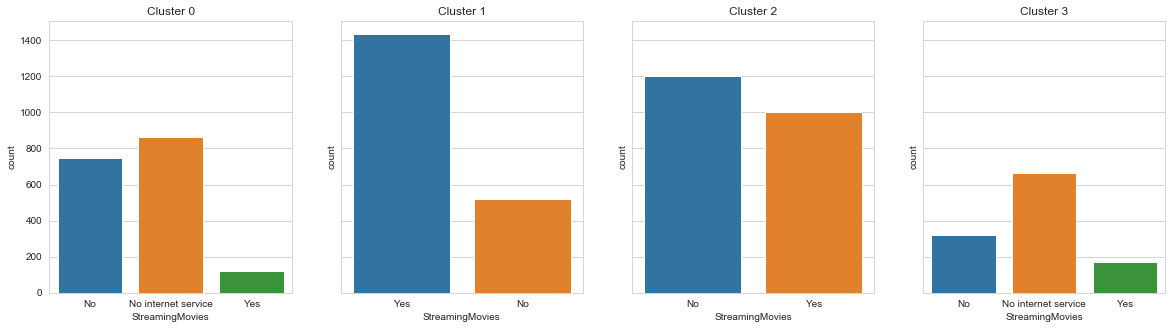

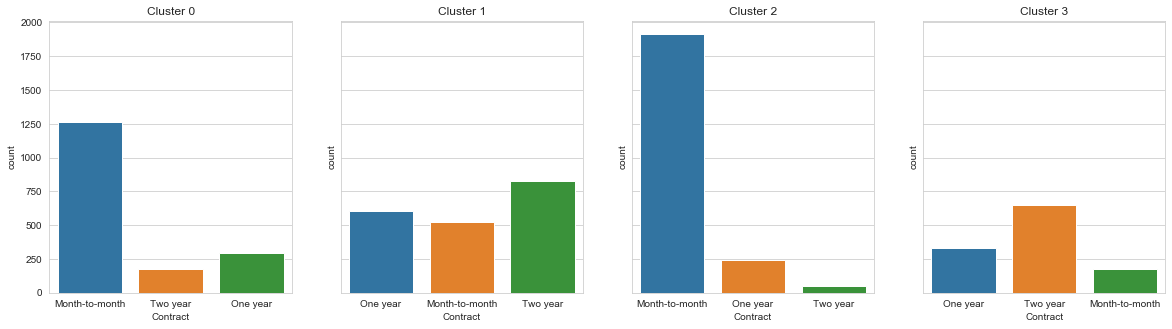

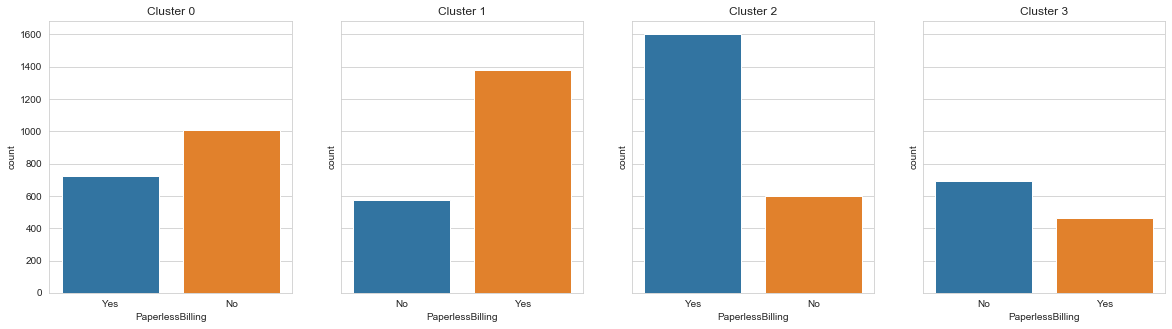

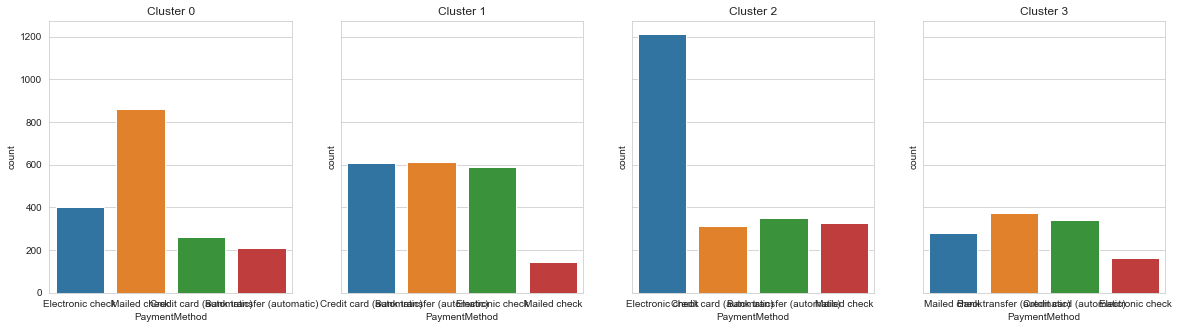

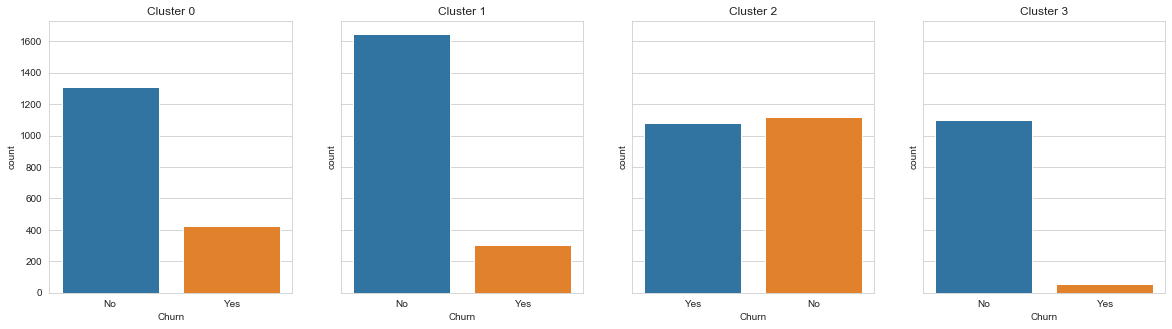

In [80]:
for i in df_object:    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True,figsize=(20,5))
    ax1.set_title('Cluster 0')
    sns.countplot(label0[i], ax=ax1)

    ax2.set_title('Cluster 1')
    sns.countplot(label1[i], ax=ax2)

    ax3.set_title('Cluster 2')
    sns.countplot(label2[i], ax=ax3)

    ax4.set_title('Cluster 3')
    sns.countplot(label3[i], ax=ax4)


# Churn Prediction

## Scaler

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [83]:
data_scaled=scaler.fit_transform(data_dummy)

In [84]:
data_scaled=pd.DataFrame(data_scaled)

In [85]:
data_scaled.columns=data_dummy.columns

In [86]:
data_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,label
0,-1.277445,-1.160323,-0.992611,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-1.355597
1,0.066327,-0.259629,-0.172165,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513,1.559957
2,-1.236724,-0.362660,-0.958066,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513,-1.355597
3,0.514251,-0.746535,-0.193672,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807,1.559957
4,-1.236724,0.197365,-0.938874,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,0.588106


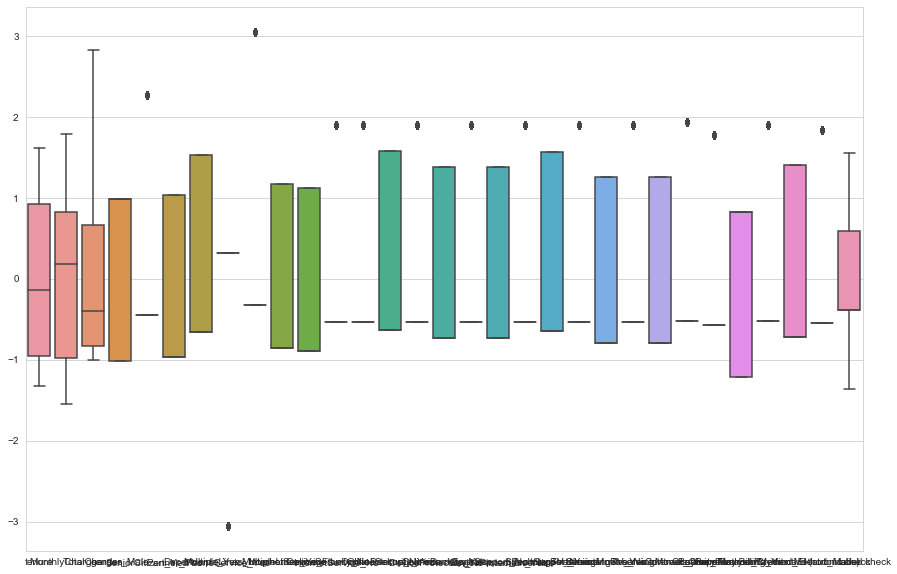

In [87]:
plt.figure(figsize=(15,10))
g=sns.boxplot(data=data_scaled)

## Classifier

### Machine learning

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


Using TensorFlow backend.


In [91]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1537
           1       0.54      0.77      0.64       576

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113

[[1159  378]
 [ 132  444]]


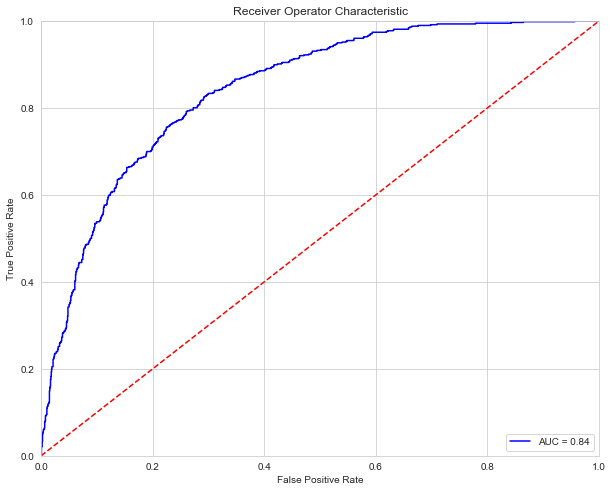

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1537
           1       0.52      0.57      0.54       576

    accuracy                           0.74      2113
   macro avg       0.67      0.69      0.68      2113
weighted avg       0.75      0.74      0.74      2113

[[1228  309]
 [ 247  329]]


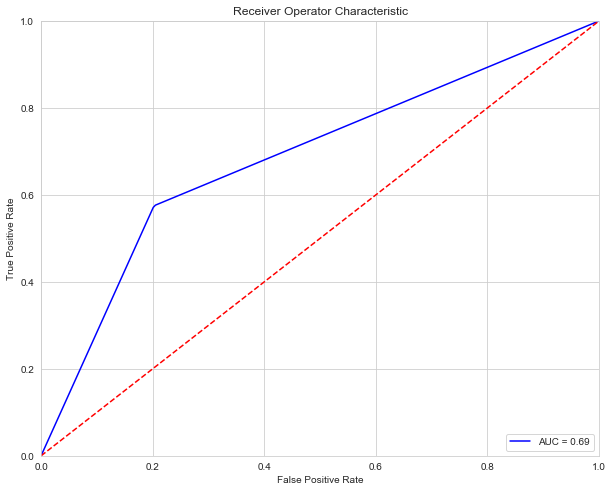

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1537
           1       0.59      0.53      0.56       576

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113

[[1328  209]
 [ 269  307]]


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


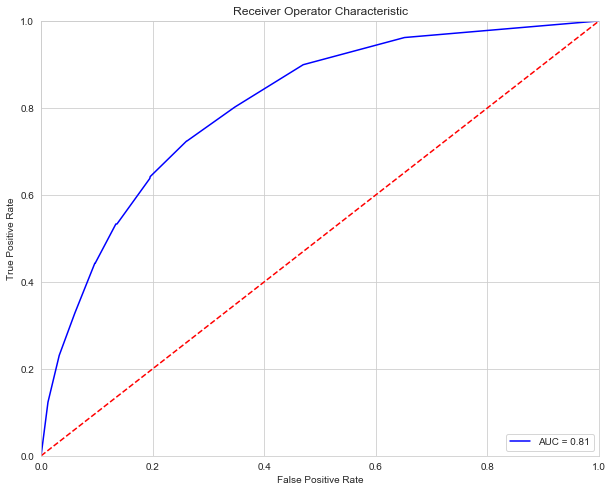

----------------------------------------------------------
GradientBoost
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1537
           1       0.60      0.66      0.63       576

    accuracy                           0.79      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.79      0.79      0.79      2113

[[1277  260]
 [ 194  382]]


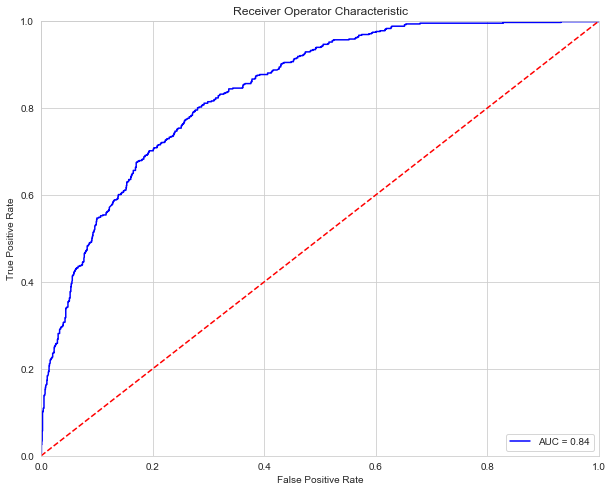

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1537
           1       0.60      0.66      0.63       576

    accuracy                           0.79      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.79      0.79      0.79      2113

[[1279  258]
 [ 194  382]]


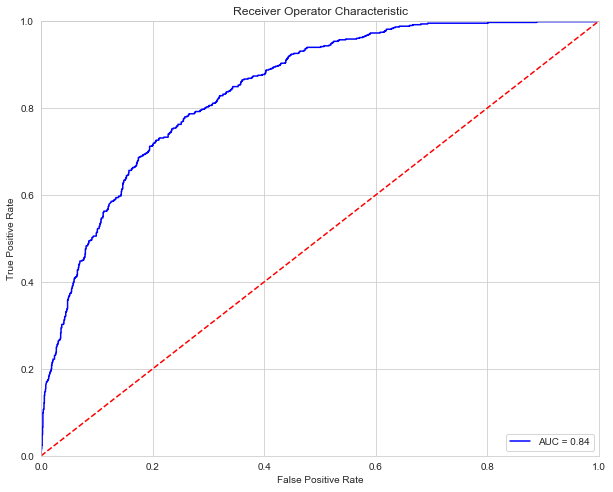

----------------------------------------------------------


In [93]:
gabungan=[['logistic',LogisticRegression()],['decision tree', DecisionTreeClassifier()],
          ['Random Forest',RandomForestClassifier()],['GradientBoost',GradientBoostingClassifier()],['XGBoost',XGBClassifier()] ]
perform=[]

X = data_scaled
target = target
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30)

# SMOTE to make the unbalanced data become balanced
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')

oversampled_trainX,oversampled_trainY=sm.fit_sample(X_train,y_train)
oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)

#looping the model
for i in gabungan:
    print(i[0])
    model=i[1]
    model.fit(oversampled_trainX,oversampled_trainY)
    predict=model.predict(X_test)
    predict_proba=model.predict_proba(X_test)
    print(classification_report(y_test,predict))
    print(confusion_matrix(y_test,predict))

    preds=predict_proba[:,1]
    fpr,tpr,threshold=roc_curve(y_test,preds)
    roc_auc=auc(fpr,tpr)

    plt.figure(figsize=(10,8))
    plt.title('Receiver Operator Characteristic')
    plt.plot(fpr,tpr,'b',label='AUC = {}'.format(round(roc_auc, 2)))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    perform.append([i[0],roc_auc])
    print('----------------------------------------------------------')

### Artificial Neural Network

In [152]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 31))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
4930/4930 [==============================] - 5s 976us/step - loss: 0.4728 - accuracy: 0.75981s - loss: 0.4875  - ETA: 0s -
Epoch 2/100
4930/4930 [==============================] - 5s 938us/step - loss: 0.4483 - accuracy: 0.7882
Epoch 3/100
4930/4930 [==============================] - 5s 936us/step - loss: 0.4392 - accuracy: 0.7947
Epoch 4/100
4930/4930 [==============================] - 5s 943us/step - loss: 0.4375 - accuracy: 0.79290s -
Epoch 5/100
4930/4930 [==============================] - 5s 944us/step - loss: 0.4413 - accuracy: 0.7882
Epoch 6/100
4930/4930 [==============================] - 5s 940us/step - loss: 0.4346 - accuracy: 0.7925
Epoch 7/100
4930/4930 [==============================] - 5s 941us/step - loss: 0.4349 - accuracy: 0.79290s - loss: 0.4349 - accuracy: 0.79
Epoch 8/100
4930/4930 [==============================] - 5s 936us/step - loss: 0.4358 - accuracy: 0.7892
Epoch 9/100
4930/4930 [==============================] - 5s 938us/step - loss: 0.4305 - accu

4930/4930 [==============================] - 5s 951us/step - loss: 0.4178 - accuracy: 0.80300s - loss: 0.4
Epoch 65/100
4930/4930 [==============================] - 5s 936us/step - loss: 0.4194 - accuracy: 0.8026
Epoch 66/100
4930/4930 [==============================] - 5s 939us/step - loss: 0.4154 - accuracy: 0.8061
Epoch 67/100
4930/4930 [==============================] - 5s 942us/step - loss: 0.4191 - accuracy: 0.80911s - loss: 0.4262 - accuracy - ETA: 0s - loss: - ETA: 0s - loss: 0.4207 - accuracy
Epoch 68/100
4930/4930 [==============================] - 5s 939us/step - loss: 0.4131 - accuracy: 0.8075
Epoch 69/100
4930/4930 [==============================] - 5s 944us/step - loss: 0.4210 - accuracy: 0.8034
Epoch 70/100
4930/4930 [==============================] - 5s 939us/step - loss: 0.4208 - accuracy: 0.8043
Epoch 71/100
4930/4930 [==============================] - 5s 942us/step - loss: 0.4212 - accuracy: 0.79962s - loss: 0
Epoch 72/100
4930/4930 [==============================] -

In [145]:
predict=classifier.predict(X_test)

In [146]:
df_predict=pd.DataFrame(predict)

In [147]:
ann_predict=df_predict[0].round()

In [148]:
predict_proba=classifier.predict_proba(X_test)

In [149]:
print(classification_report(y_test,ann_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1537
           1       0.63      0.52      0.57       576

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [125]:
print(classification_report(y_test,ann_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1537
           1       0.57      0.54      0.55       576

    accuracy                           0.76      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.76      0.76      0.76      2113



In [142]:
print(confusion_matrix(y_test,ann_predict))

[[1367  170]
 [ 285  291]]


In [150]:
print(confusion_matrix(y_test,ann_predict))

[[1358  179]
 [ 275  301]]


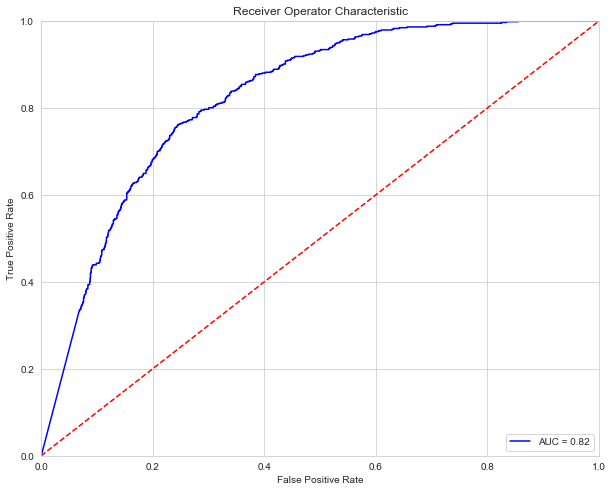

In [135]:
preds=predict_proba
fpr,tpr,threshold=roc_curve(y_test,preds)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

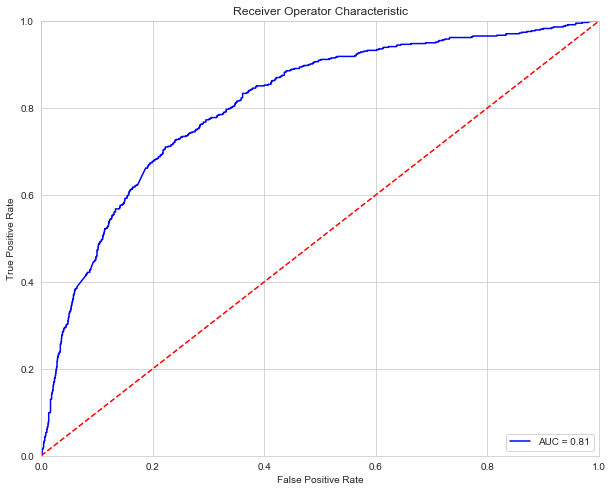

In [151]:
preds=predict_proba
fpr,tpr,threshold=roc_curve(y_test,preds)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()